In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')

# Importing from my own modules
import sys
sys.path.append('../financial_forecasting/')
from utils import load_data

# Load data

In [4]:
df_train, df_test = load_data()

Note: The competition organisers have created the train and test data by splitting on `Day`.

In [8]:
df_train.columns

Index(['Market', 'Day', 'Stock', 'x0', 'x1', 'x2', 'x3A', 'x3B', 'x3C', 'x3D',
       'x3E', 'x4', 'x5', 'x6', 'y', 'Weight'],
      dtype='object')

x0...x3E: Predictors that relate to the observed behaviour of the instrument on the day in question. The features labelled 'x3A', 'x3B', etc. are strongly related and might be expected to be highly correlated.


x4...x6: Predictors that describe the ‘typical’ behaviour that we would expect of the instrument on that day.

# Check for missing values

In [3]:
df_train.isnull().sum()

Market     0
Day        0
Stock      0
x0         0
x1        55
x2         5
x3A        0
x3B        0
x3C        0
x3D        0
x3E        0
x4         0
x5         0
x6         0
y          0
Weight     0
dtype: int64

In [6]:
df_train[df_train.x2.isnull()]

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6,y,Weight
Index,,,,,,,,,,,,,,,,
147745,2,364,2120,0.349760,2.567186,NaN,0.002585,0.006343,0.007768,0.007793,0.007793,0.004724,0.035893,420.0,0.006016,0.239916
152693,2,397,2120,0.000156,0.845153,NaN,0.000009,0.000009,0.000004,0.000004,0.000004,0.006169,0.000002,400.0,-0.001166,0.310602
167183,2,496,1855,0.016572,NaN,NaN,0.000553,0.000614,0.000597,0.000676,0.000648,0.005254,0.002306,260.0,0.001392,0.541035
181284,2,615,1740,0.000051,NaN,NaN,0.000143,0.000273,0.000470,0.001137,0.002195,0.002797,0.000018,1200.0,-0.000073,0.783325
195706,2,728,2470,0.001321,1.578615,NaN,0.000004,0.000004,0.000004,0.000004,0.000004,0.023121,0.000017,1100.0,-0.000050,0.341432


In [8]:
df_train[df_train.x1.isnull()].head()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6,y,Weight
Index,,,,,,,,,,,,,,,,
59134,1,434,2040,0.077719,NaN,0.710557,0.000093,0.000278,0.000519,0.000814,0.000407,0.006490,0.000232,150.000000,-0.003755,0.569329
93151,2,12,2251,0.033336,NaN,12.369049,0.000057,0.000097,0.000196,0.000208,0.000146,0.013801,0.000056,1050.646688,-0.002436,3.846608
96838,2,44,784,0.005662,NaN,1.188234,0.000001,0.000003,0.000005,0.000008,0.000006,0.001548,0.000002,160.000000,-0.000419,5.377814
101462,2,64,1855,0.039023,NaN,0.468760,0.000034,0.000040,0.000083,0.000177,0.000463,0.003031,0.000133,280.000000,-0.002763,2.231659
110633,2,128,1740,0.000041,NaN,1.874278,0.000005,0.000013,0.000010,0.000016,0.000026,0.001366,0.000016,600.000000,0.000370,1.313081


In [4]:
df_test.isnull().sum()

Market     0
Day        0
Stock      0
x0         0
x1        62
x2         2
x3A        0
x3B        0
x3C        0
x3D        0
x3E        0
x4         0
x5         0
x6         0
dtype: int64

In [10]:
df_test[df_test.x2.isnull()]

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6
Index,,,,,,,,,,,,,,
93922,2,28,1855,0.089538,1.578366,NaN,0.000014,0.000047,0.000086,0.000166,0.000221,0.002226,0.000056,300.000000
188713,2,657,948,0.001074,0.616041,NaN,0.000010,0.000021,0.000032,0.000050,0.000100,0.001723,0.000051,413.879916


In [11]:
df_test[df_test.x1.isnull()].head()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6
Index,,,,,,,,,,,,,,
9004,1,79,2252,0.000042,NaN,0.289996,0.000069,0.000011,7.294668e-08,7.294668e-08,7.294668e-08,0.004314,0.000006,200.000000
32485,1,281,775,0.015176,NaN,0.842518,0.000098,0.000131,1.183051e-04,2.332141e-04,2.336844e-04,0.002372,0.000235,100.000000
91120,2,13,2251,0.049524,NaN,34.324482,0.000043,0.000100,4.670751e-04,5.901155e-04,2.349351e-04,0.015149,0.000047,5000.000000
96503,2,40,2251,0.006971,NaN,9.759551,0.000031,0.000055,6.436396e-05,7.006024e-05,4.778727e-05,0.012295,0.000070,2400.000000
101090,2,79,2581,0.003420,NaN,3.800518,0.000005,0.000013,2.445116e-05,4.808001e-05,9.783472e-05,0.001105,0.000020,288.073551


# Pandas profiling

In [12]:
# Profile training data
pandas_profiling.ProfileReport(df_train, correlation_overrides=list(df_train.columns))

Number of variables,17
Number of observations,623817
Total Missing (%),0.0%
Total size in memory,80.9 MiB
Average record size in memory,136.0 B
Numeric,17
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [13]:
# Profile test data
pandas_profiling.ProfileReport(df_test, correlation_overrides=list(df_test.columns))

Number of variables,15
Number of observations,640430
Total Missing (%),0.0%
Total size in memory,73.3 MiB
Average record size in memory,120.0 B
Numeric,15
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Pandas profiling detects skewness in 'x' variables. The bin width selected by pandas profiling for these variables is not useful. We now examine these distributions manually.

# Examine distribution of features via boxplots 

In [12]:
# According to the feature descriptions, the features group into 3 natural categories
feat_1 = ['x0', 'x1', 'x2']
feat_2 = ['x3A', 'x3B', 'x3C', 'x3D', 'x3E' ]
feat_3 = ['x4', 'x5', 'x6']

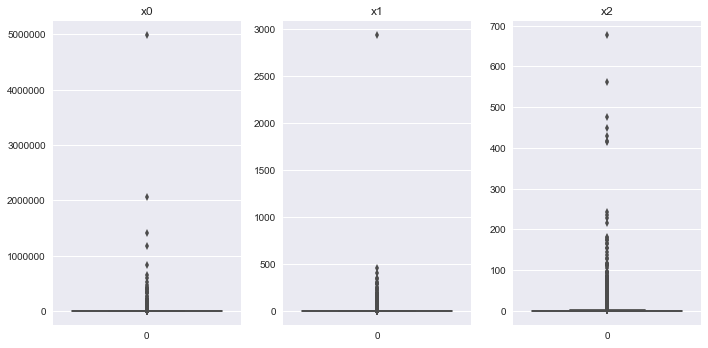

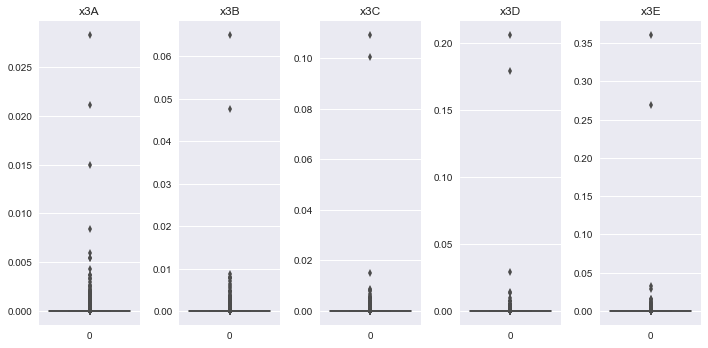

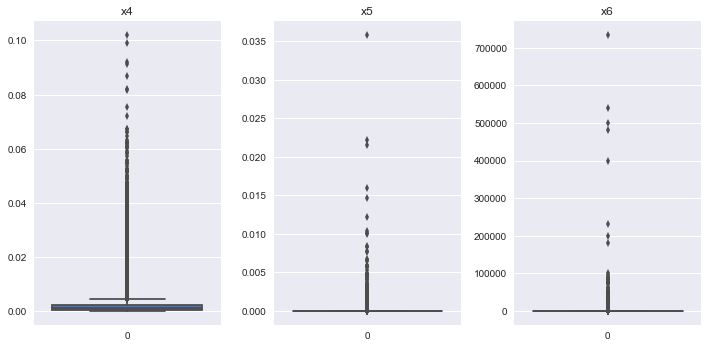

In [29]:
fig,ax = plt.subplots(nrows=1, ncols=len(feat_1), figsize=[10, 5])
for ix, feat in enumerate(feat_1):
    sns.boxplot(data=df_train.loc[:,feat], ax=ax[ix])
    ax[ix].set_title(feat)
fig.tight_layout()

fig,ax = plt.subplots(nrows=1, ncols=len(feat_2), figsize=[10, 5])
for ix, feat in enumerate(feat_2):
    sns.boxplot(data=df_train.loc[:,feat], ax=ax[ix])
    ax[ix].set_title(feat)
fig.tight_layout()

fig,ax = plt.subplots(nrows=1, ncols=len(feat_3), figsize=[10, 5])
for ix, feat in enumerate(feat_3):
    sns.boxplot(data=df_train.loc[:,feat], ax=ax[ix])
    ax[ix].set_title(feat)
fig.tight_layout()

The variables are highly skewed. Could be outliers or part of a non-normal distribution where the data is distributed over several orders of magnitude. Will examine distributions on a log scale.

In [26]:
# Check number of zeros to see how many -inf values will be generated from taking the log transform
(df_train == 0).sum()

Market      0
Day         0
Stock     137
x0        167
x1          0
x2          0
x3A       370
x3B       392
x3C       394
x3D       394
x3E       395
x4          0
x5        160
x6          0
y           0
Weight      0
dtype: int64

/Users/km1308/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/km1308/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/km1308/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


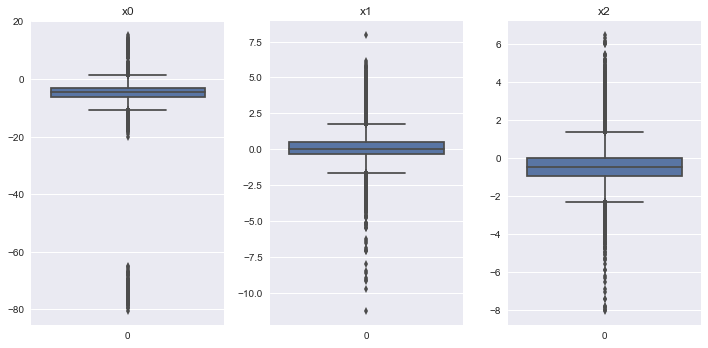

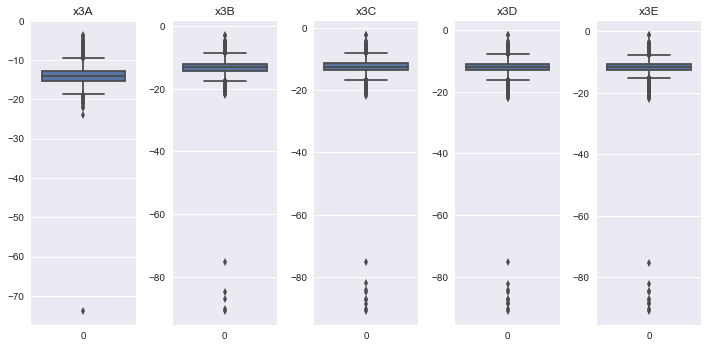

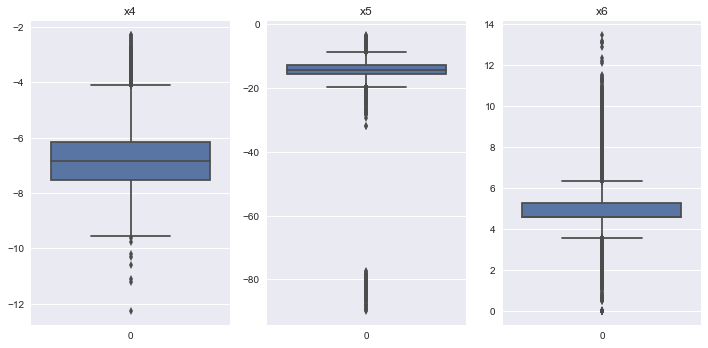

In [28]:
fig,ax = plt.subplots(nrows=1, ncols=len(feat_1), figsize=[10, 5])
for ix, feat in enumerate(feat_1):
    sns.boxplot(data=np.log(df_train.loc[:,feat]), ax=ax[ix])
    ax[ix].set_title(feat)
fig.tight_layout()

fig,ax = plt.subplots(nrows=1, ncols=len(feat_2), figsize=[10, 5])
for ix, feat in enumerate(feat_2):
    sns.boxplot(data=np.log(df_train.loc[:,feat]), ax=ax[ix])
    ax[ix].set_title(feat)
fig.tight_layout()

fig,ax = plt.subplots(nrows=1, ncols=len(feat_3), figsize=[10, 5])
for ix, feat in enumerate(feat_3):
    sns.boxplot(data=np.log(df_train.loc[:,feat]), ax=ax[ix])
    ax[ix].set_title(feat)
fig.tight_layout()

# Examine distribution of features via histograms and use log transforms

In [44]:
features = [feat for feat in df_train.columns if 'x' in feat]

Check number of zeros in the features. This is because when we take the logarithm of these features we will get infinities.

/Users/km1308/anaconda/envs/working_env/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


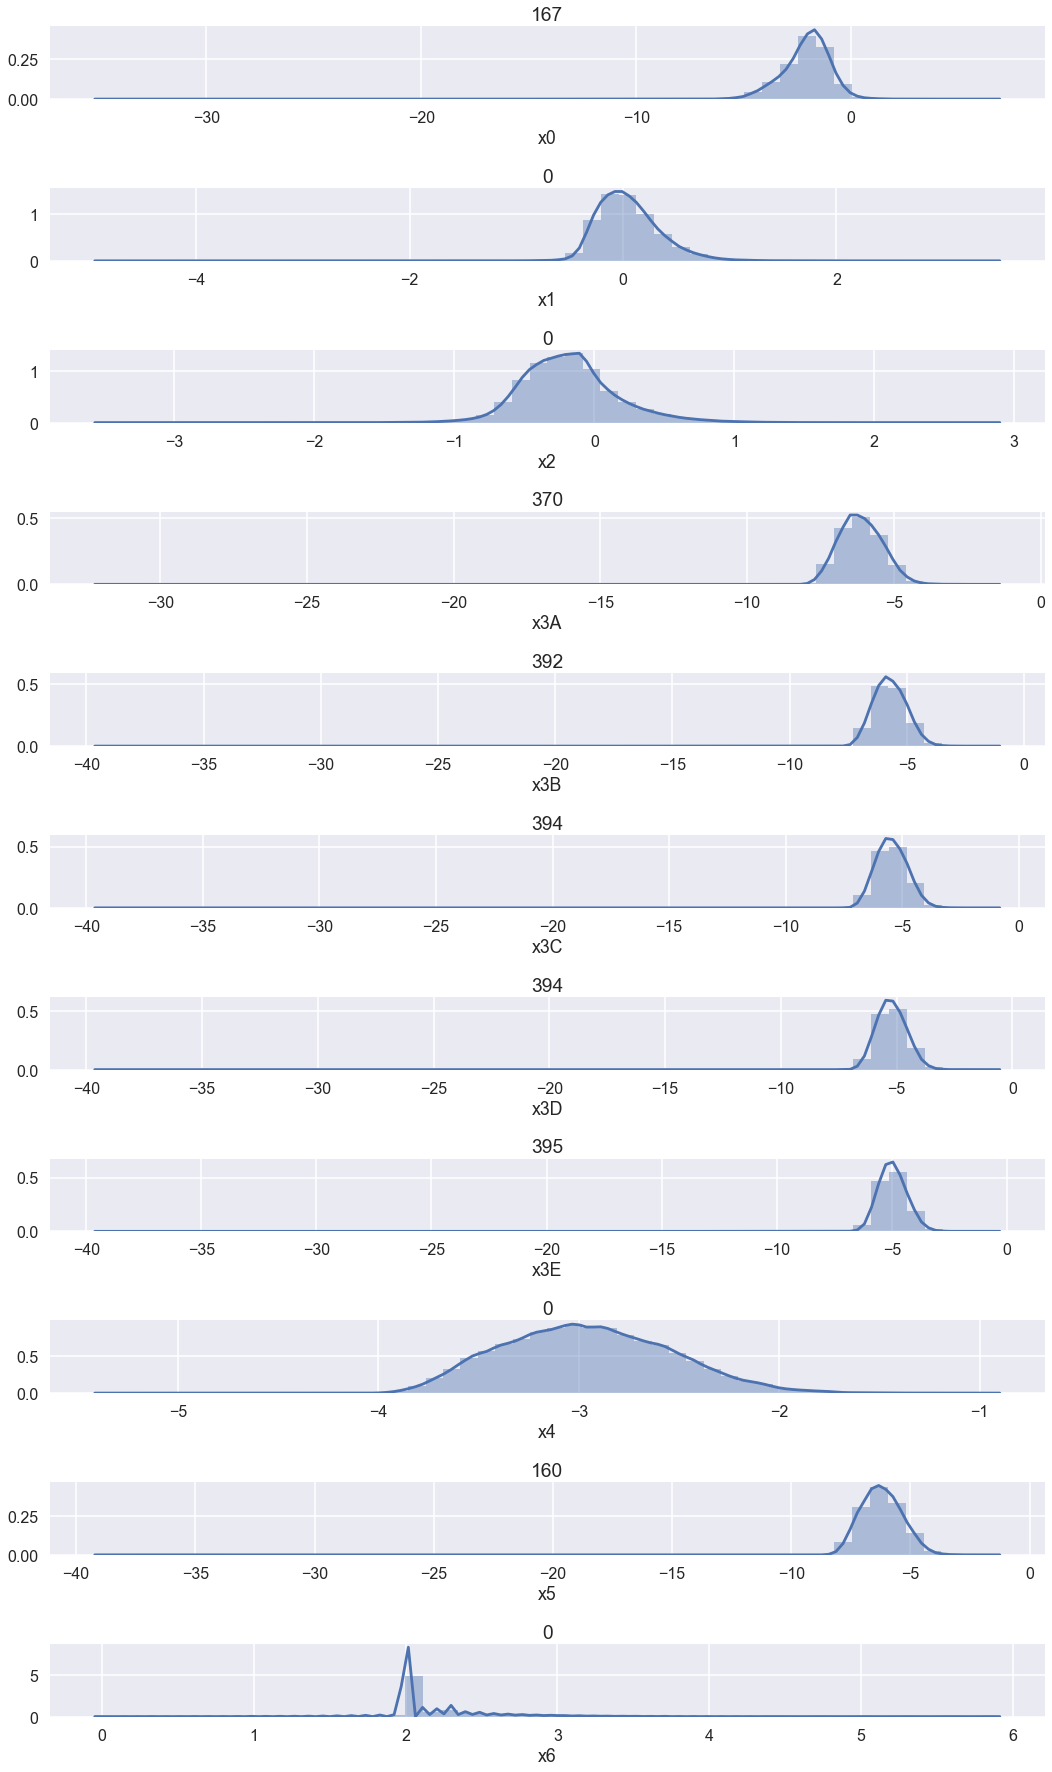

In [56]:
# Log of features
fig,ax = plt.subplots(nrows=len(features),ncols=1,figsize=[15,25])
for ix, f in enumerate(features):
    sns.distplot(np.log10(df_train[f][df_train[f] > 0]), ax=ax[ix])
plt.tight_layout()
plt.show()

Data appears to be log normal. x6 could be a heavy tailed distribution. Let's examine this feature further.

In [63]:
df_train['x6'].describe()

count    623817.000000
mean        275.436028
std        1799.850048
min           1.000000
25%         100.000000
50%         100.000000
75%         200.000000
max      734914.404967
Name: x6, dtype: float64

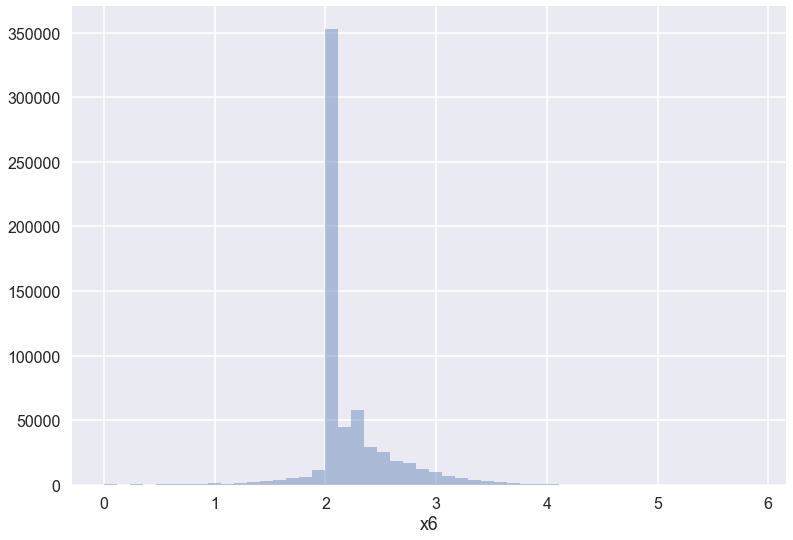

In [69]:
sns.distplot(np.log10(df_train['x6'][df_train.x6 > 0]), kde=False)

In [95]:
df_train['x6'][df_train.x6 > 0].value_counts().head(20)

100.0    110960
100.0     29959
100.0     26954
100.0     17836
100.0     16097
100.0     13696
100.0     12432
100.0     11851
100.0     10643
100.0      6687
100.0      5976
100.0      5805
100.0      4944
200.0      3892
100.0      3382
100.0      2911
200.0      2632
100.0      2332
100.0      2139
100.0      2057
Name: x6, dtype: int64

Large set of values cluster around multiples of 100

# Are the distribution of days in the training and test sets similar?

In [96]:
df_train.Day.describe()

count    623817.000000
mean        343.908465
std         209.625123
min           1.000000
25%         161.000000
50%         334.000000
75%         518.000000
max         729.000000
Name: Day, dtype: float64

In [97]:
df_test.Day.describe()

count    640430.000000
mean        380.942459
std         206.992627
min          13.000000
25%         205.000000
50%         383.000000
75%         565.000000
max         727.000000
Name: Day, dtype: float64

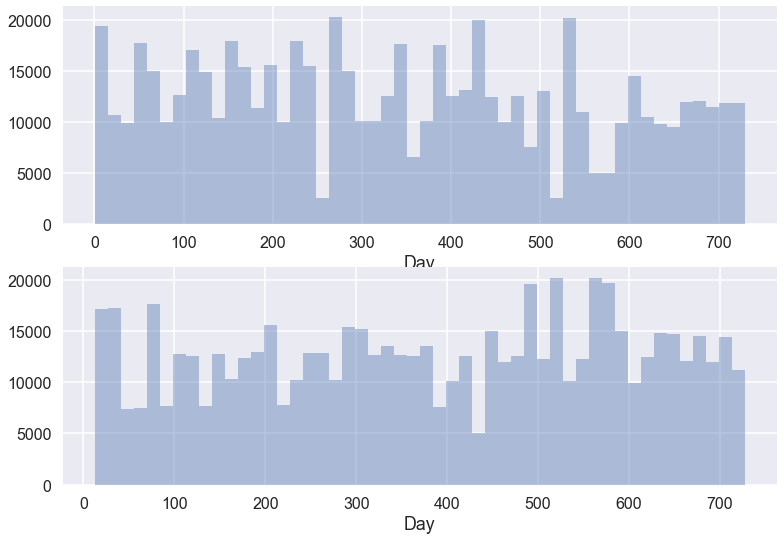

In [101]:
fig,ax = plt.subplots(nrows=2,ncols=1)
sns.distplot(df_train['Day'], ax=ax[0], kde=False)
sns.distplot(df_test['Day'], ax=ax[1], kde=False)

## Let's examine the behaviour of the variables with time

In [107]:
def compute_log_feats(df, features):
    """
    Creates log transform of input features and appends them to the dataframe
    """
    for feat in features:
        df[feat + '_log10'] = np.log10(df[feat])
        
    return df

In [109]:
features = [feat for feat in df_train.columns if 'x' in feat]
df_train = compute_log_feats(df_train, features=features)

/Users/km1308/anaconda/envs/working_env/lib/python3.4/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


In [123]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.fillna(0, inplace=True)

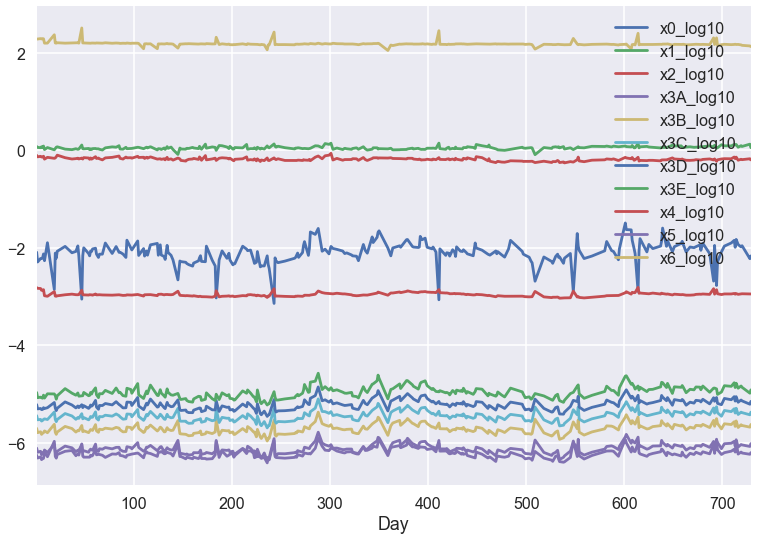

In [124]:
df_train.groupby(by='Day').mean()[[f+'_log10' for f in features]].plot()

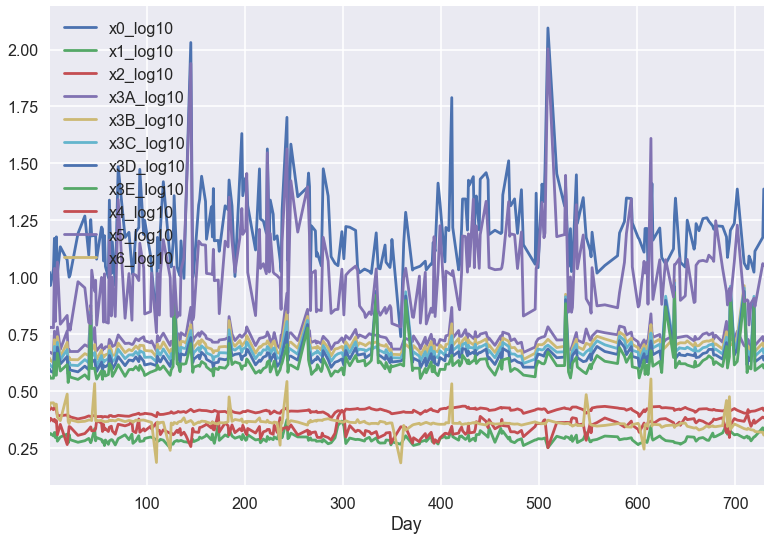

In [125]:
df_train.groupby(by='Day').std()[[f+'_log10' for f in features]].plot()

# Examine behaviour of the target variable

In [133]:
df_train.y.describe()

count    623817.000000
mean          0.000075
std           0.001047
min          -0.071099
25%          -0.000107
50%           0.000027
75%           0.000203
max           0.066617
Name: y, dtype: float64

In [139]:
df_train.y.value_counts().head(5)

-0.000065    335
-0.000120     46
-0.000050     38
-0.000065     12
-0.000050      3
Name: y, dtype: int64

In [134]:
(df_train.y == 0).sum()

0

(-0.01, 0.01)

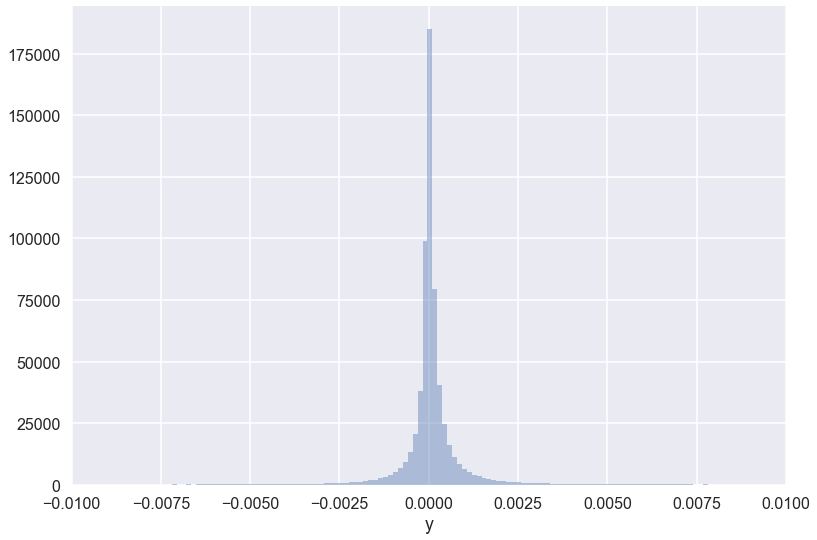

In [151]:
ax = sns.distplot(df_train.y, bins=1000, kde=False)
ax.set_xlim([-0.01,0.01])

# Look at relationship by market

In [166]:
df_train.groupby('Market')['Stock'].nunique()

Market
1     452
2     546
3    1793
4     231
Name: Stock, dtype: int64

In [167]:
df_test.groupby('Market')['Stock'].nunique()

Market
1     452
2     544
3    1790
4     231
Name: Stock, dtype: int64

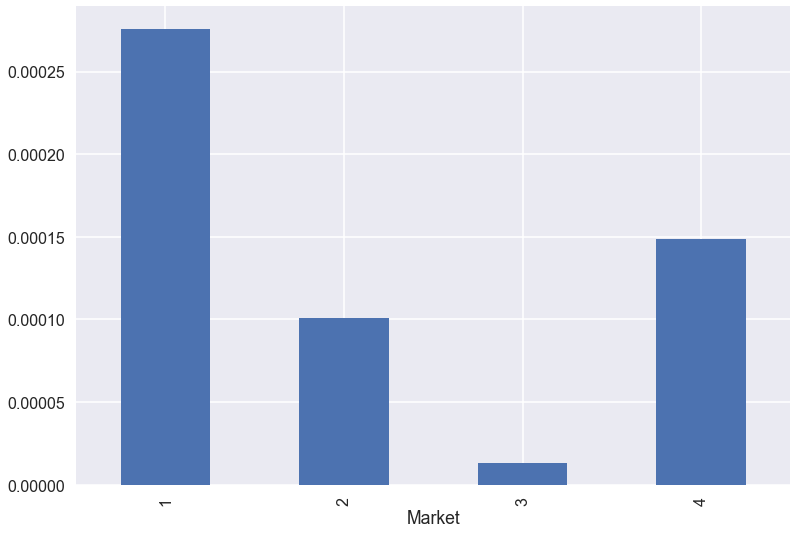

In [162]:
df_train.groupby('Market').mean()['y'].plot(kind='bar')

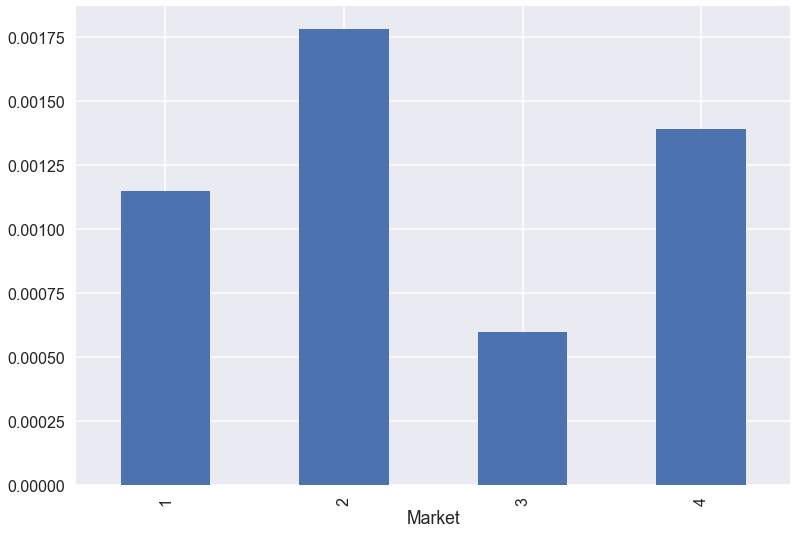

In [168]:
df_train.groupby('Market').std()['y'].plot(kind='bar')

In [173]:
df_train.groupby('Market').mean()['Weight']

Market
1    11.000076
2    12.909213
3    15.362299
4    21.160402
Name: Weight, dtype: float64

In [175]:
df_train.groupby('Market').sum()['Weight'] / df_train.groupby('Market').sum()['Weight'].sum()

Market
1    0.107603
2    0.149326
3    0.642158
4    0.100912
Name: Weight, dtype: float64

Errors on market 3 have the most weight